## Problem statement

In [1]:
##### Company wants to automate the loan eligibility process based on their customer detail provided.

## Loading packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
print(train.shape,"Train size")
print(test.shape,"Test size")

(614, 13) Train size
(367, 12) Test size


In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Univariate Analysis
### For TARGET variable

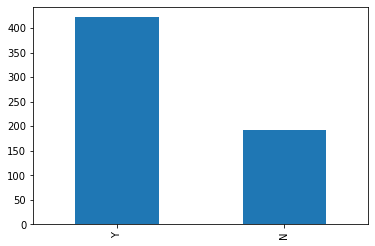

In [9]:
### For categorical target use freq.table or bar plots
### For numerical target use probablity density for distributions
train['Loan_Status'].value_counts().plot.bar()

### For independent variable
###### categorical,ordinal,nominal

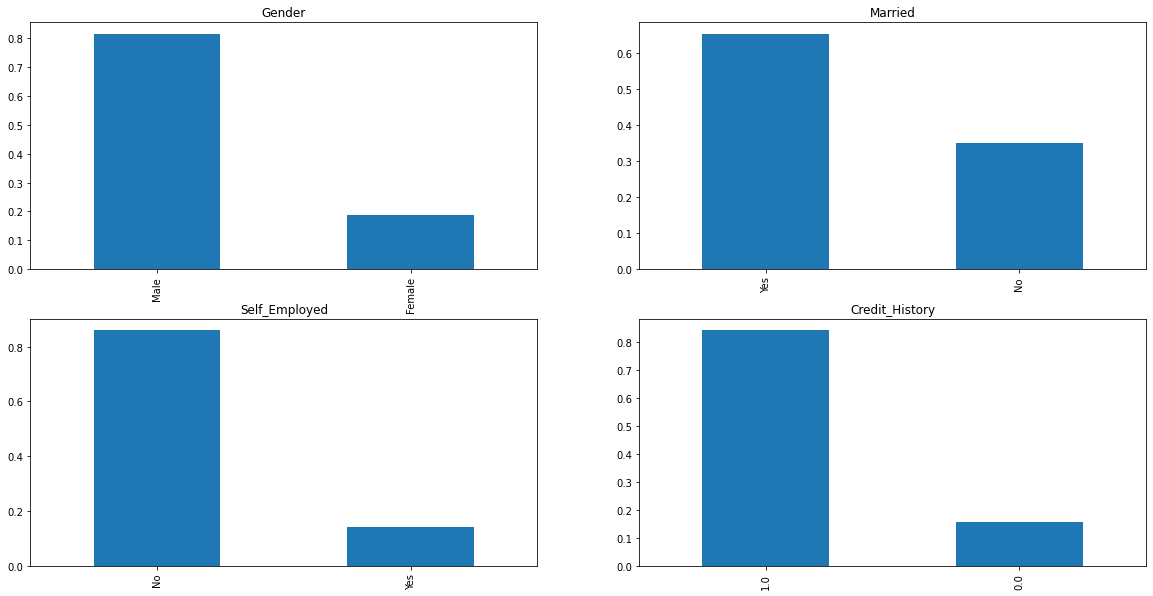

In [10]:
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

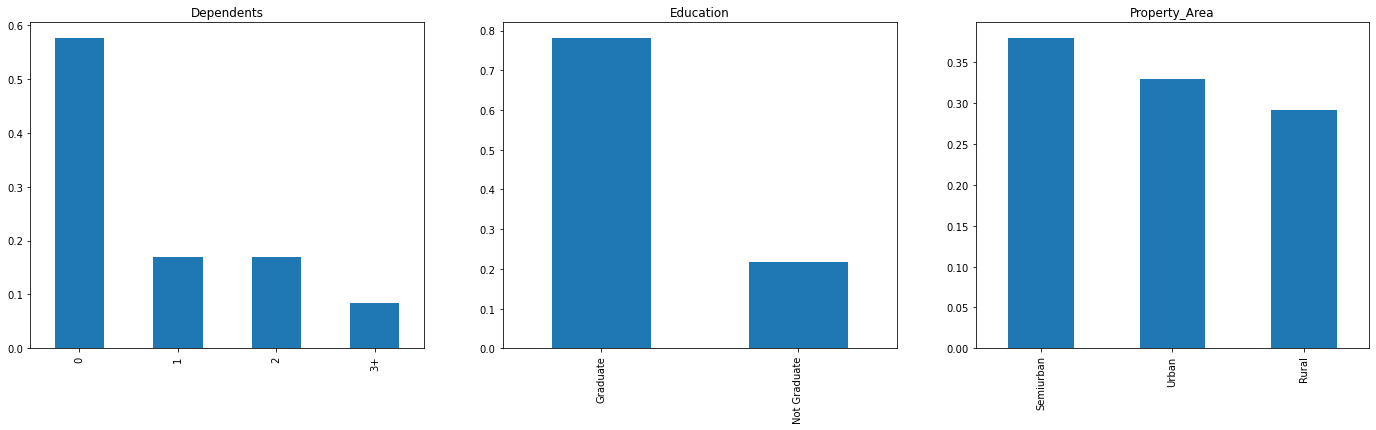

In [11]:
plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

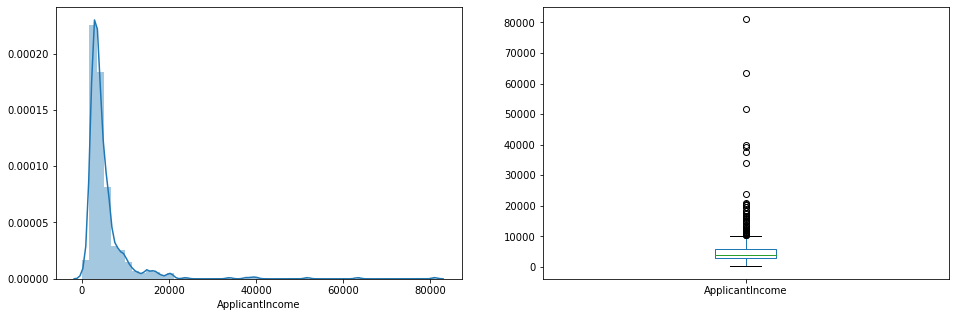

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [13]:
### this boxplot tells us graph is not normally distributed and also it has many outliers
### Let us segregate them by education through boxplot

Text(0.5, 0.98, '')

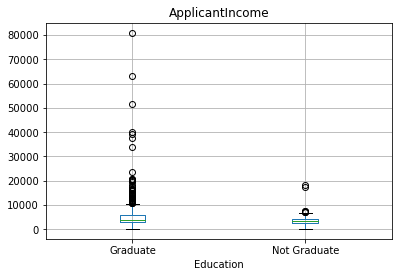

In [14]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle("")
# Text(0.5,0.98,'')

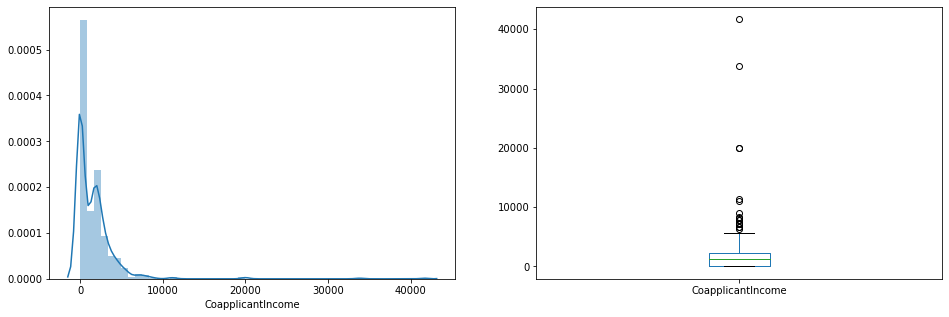

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

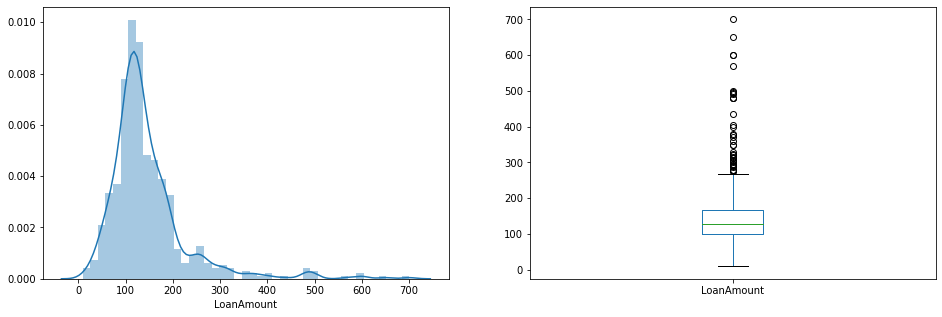

In [16]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [17]:
#### Fairly distributed and still has outliers

## Bivariate Analysis
#### How each features corelates with target variable
#### Performing hypothesis testing here

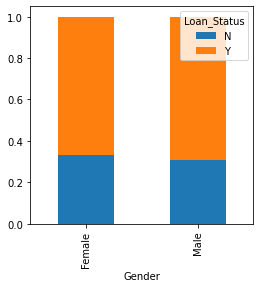

In [18]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

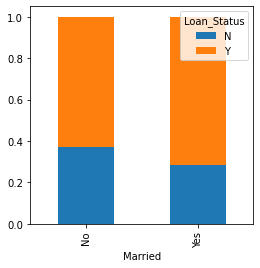

In [19]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

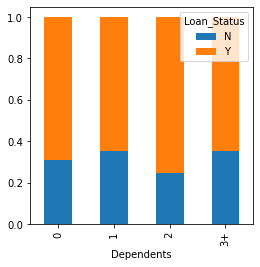

In [20]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

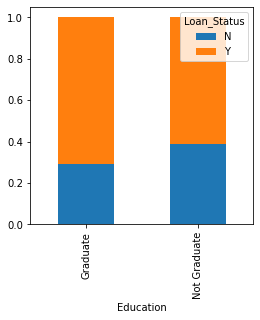

In [21]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

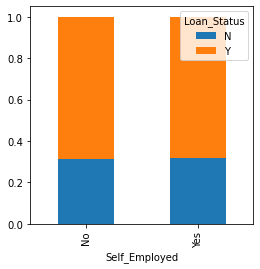

In [22]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

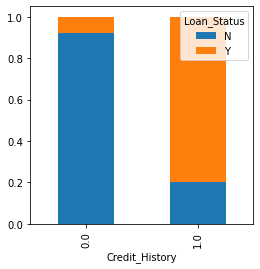

In [23]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

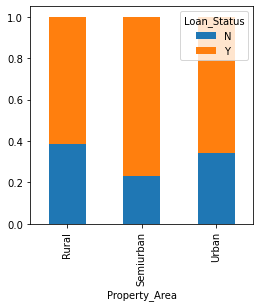

In [24]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

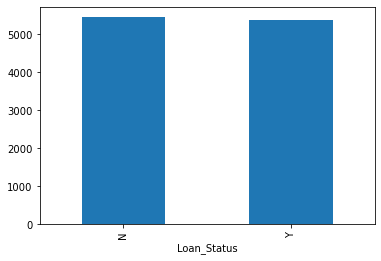

In [25]:
### Compare Mean income
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [26]:
## We dont see any change in the mean income.So we can make into bins to analyze

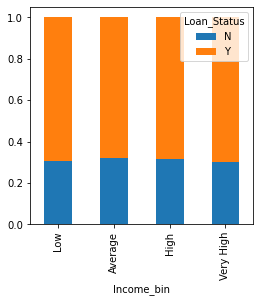

In [27]:
bins = [0,3000,5000,7000,81000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [28]:
## It tells us income will not affect the loan approval.So one of our hypothesis contradicts.

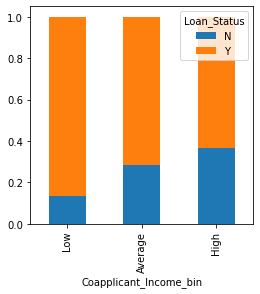

In [29]:
bins = [0,1000,5000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [30]:
# This does not look right as less income has high chance of approval.It is coz most of the applicants dont have coapplicants income so that is equal to zero.
# So we need to combine

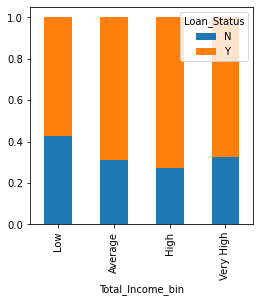

In [31]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,3000,5000,7000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

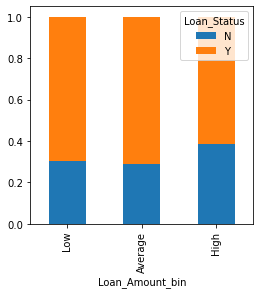

In [32]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['Loan_Amount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)

Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [33]:
# Here it supports our hypothesis that chances of approval is high when  loan amount is less
# Now Encoding..Replace with numerical values

In [34]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,Loan_Amount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average,Average,6091.0,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Low,NaN,3000.0,Low,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Low,Average,4941.0,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Low,NaN,2900.0,Low,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,Average,NaN,4106.0,Average,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very High,Low,8312.0,Very High,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very High,NaN,7583.0,Very High,Average


In [35]:
# Drop bins
train = train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income','Total_Income_bin','Loan_Amount_bin'], axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

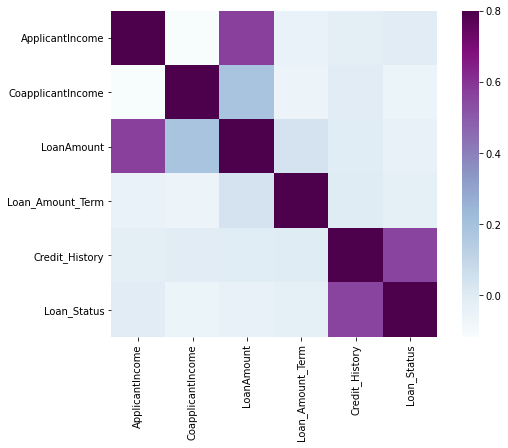

In [36]:
# Now checking Corelation using heat maps.
# Variables with darker colors then their corelation is more
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,cmap="BuPu",square=True);

In [37]:
# Most corelation is b/w (ApplicantIncome and Loan Amount),(Credit_History and Loan_Status)

## Missing values imputation

In [38]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# To fill missing values:
#     For numerical var: using mean or median
#     For categorical var: using mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [40]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
# Since it is numerical variable, It has less num of unique values.Here value of 360 is repeating most so replace with the mode of that variable
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [42]:
# Now replace with median rather than mean for loan amount as it has high outliers 
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [43]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
# Same approach for missing values in test data set
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [45]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

## Outlier Treatment`

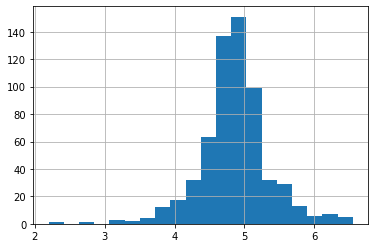

In [46]:
# Loan amount has right skewness .One way to remove skewness is log transformation which makes our distribution to be close to normal and removes outliers
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Building our model - Part1

In [47]:
#### Drop loanid
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [48]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [49]:
### Making dummy variables
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Train test split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 10,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 21)
(429,)
(185, 21)
(185,)


## Model building using logistic

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(x_test)

In [53]:
score_test = accuracy_score(y_test,y_pred)
print("Accuracy score",score_test)

Accuracy score 0.7891891891891892


In [54]:
train_y_pred = model.predict(x_train)

In [55]:
accuracy_score(y_train,train_y_pred)

0.8065268065268065

### Lets make predictions for the test dataset

In [56]:
pred_test = model.predict(test)

In [57]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

In [58]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [59]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [60]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [61]:
logistic_file = pd.read_csv('logistic.csv')

In [62]:
logistic_file.drop(['Unnamed: 0'], axis=1)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [63]:
pd.DataFrame(logistic_file, columns=['Loan_ID','Loan_Status']).to_csv('logistic_submission.csv')

## Stratified k folds cross validation

In [64]:
# Lets make stratified cv for 5 folds and make predictions for test dataset.
from sklearn.model_selection import StratifiedKFold

In [69]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i +=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy score 0.8048780487804879

2 of kfold 5
Accuracy score 0.8373983739837398

3 of kfold 5
Accuracy score 0.7804878048780488

4 of kfold 5
Accuracy score 0.7886178861788617

5 of kfold 5
Accuracy score 0.7950819672131147


In [68]:
## mean of 5 folds is 0.81 .View ROC curve